In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kafu99","key":"8949ac9bd0707ecbdf7d8cf3e82b9649"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d azeembootwala/titanic

  0% 0.00/12.1k [00:00<?, ?B/s]
100% 12.1k/12.1k [00:00<00:00, 10.5MB/s]


In [ ]:
!ls

kaggle.json  sample_data  titanic.zip


In [ ]:
# now extracing the zip fil. To extract the the zip file we need this code 
from zipfile import ZipFile
file_name = "titanic.zip"   # type the name of the zipped file
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

#Import the DecisionTreeClassifer Class
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve

In [ ]:
titanic_df = pd.read_csv('/content/train_data.csv')
titanic_df.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [ ]:
titanic_df.shape

(792, 17)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   792 non-null    int64  
 1   PassengerId  792 non-null    int64  
 2   Survived     792 non-null    int64  
 3   Sex          792 non-null    int64  
 4   Age          792 non-null    float64
 5   Fare         792 non-null    float64
 6   Pclass_1     792 non-null    int64  
 7   Pclass_2     792 non-null    int64  
 8   Pclass_3     792 non-null    int64  
 9   Family_size  792 non-null    float64
 10  Title_1      792 non-null    int64  
 11  Title_2      792 non-null    int64  
 12  Title_3      792 non-null    int64  
 13  Title_4      792 non-null    int64  
 14  Emb_1        792 non-null    int64  
 15  Emb_2        792 non-null    int64  
 16  Emb_3        792 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 105.3 KB


In [ ]:
titanic_df.describe()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,395.500000,396.500000,0.386364,0.647727,0.368244,0.064677,0.243687,0.208333,0.547980,0.088636,0.744949,0.005051,0.040404,0.209596,0.185606,0.092172,0.720960
std,228.774999,228.774999,0.487223,0.477980,0.162994,0.100987,0.429577,0.406373,0.498007,0.154485,0.436165,0.070932,0.197029,0.407277,0.389034,0.289451,0.448811
min,0.000000,1.000000,0.000000,0.000000,0.008375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,197.750000,198.750000,0.000000,0.000000,0.275000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,395.500000,396.500000,0.000000,1.000000,0.350000,0.028302,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,593.250000,594.250000,1.000000,1.000000,0.437500,0.061045,0.000000,0.000000,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,791.000000,792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#checking the missing values
titanic_df.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

In [ ]:
# checking balanced and imbalanced data class
titanic_df['Survived'].unique()

array([0, 1])

In [ ]:
titanic_df['Survived'].value_counts()

0    486
1    306
Name: Survived, dtype: int64

The classes are not balanced

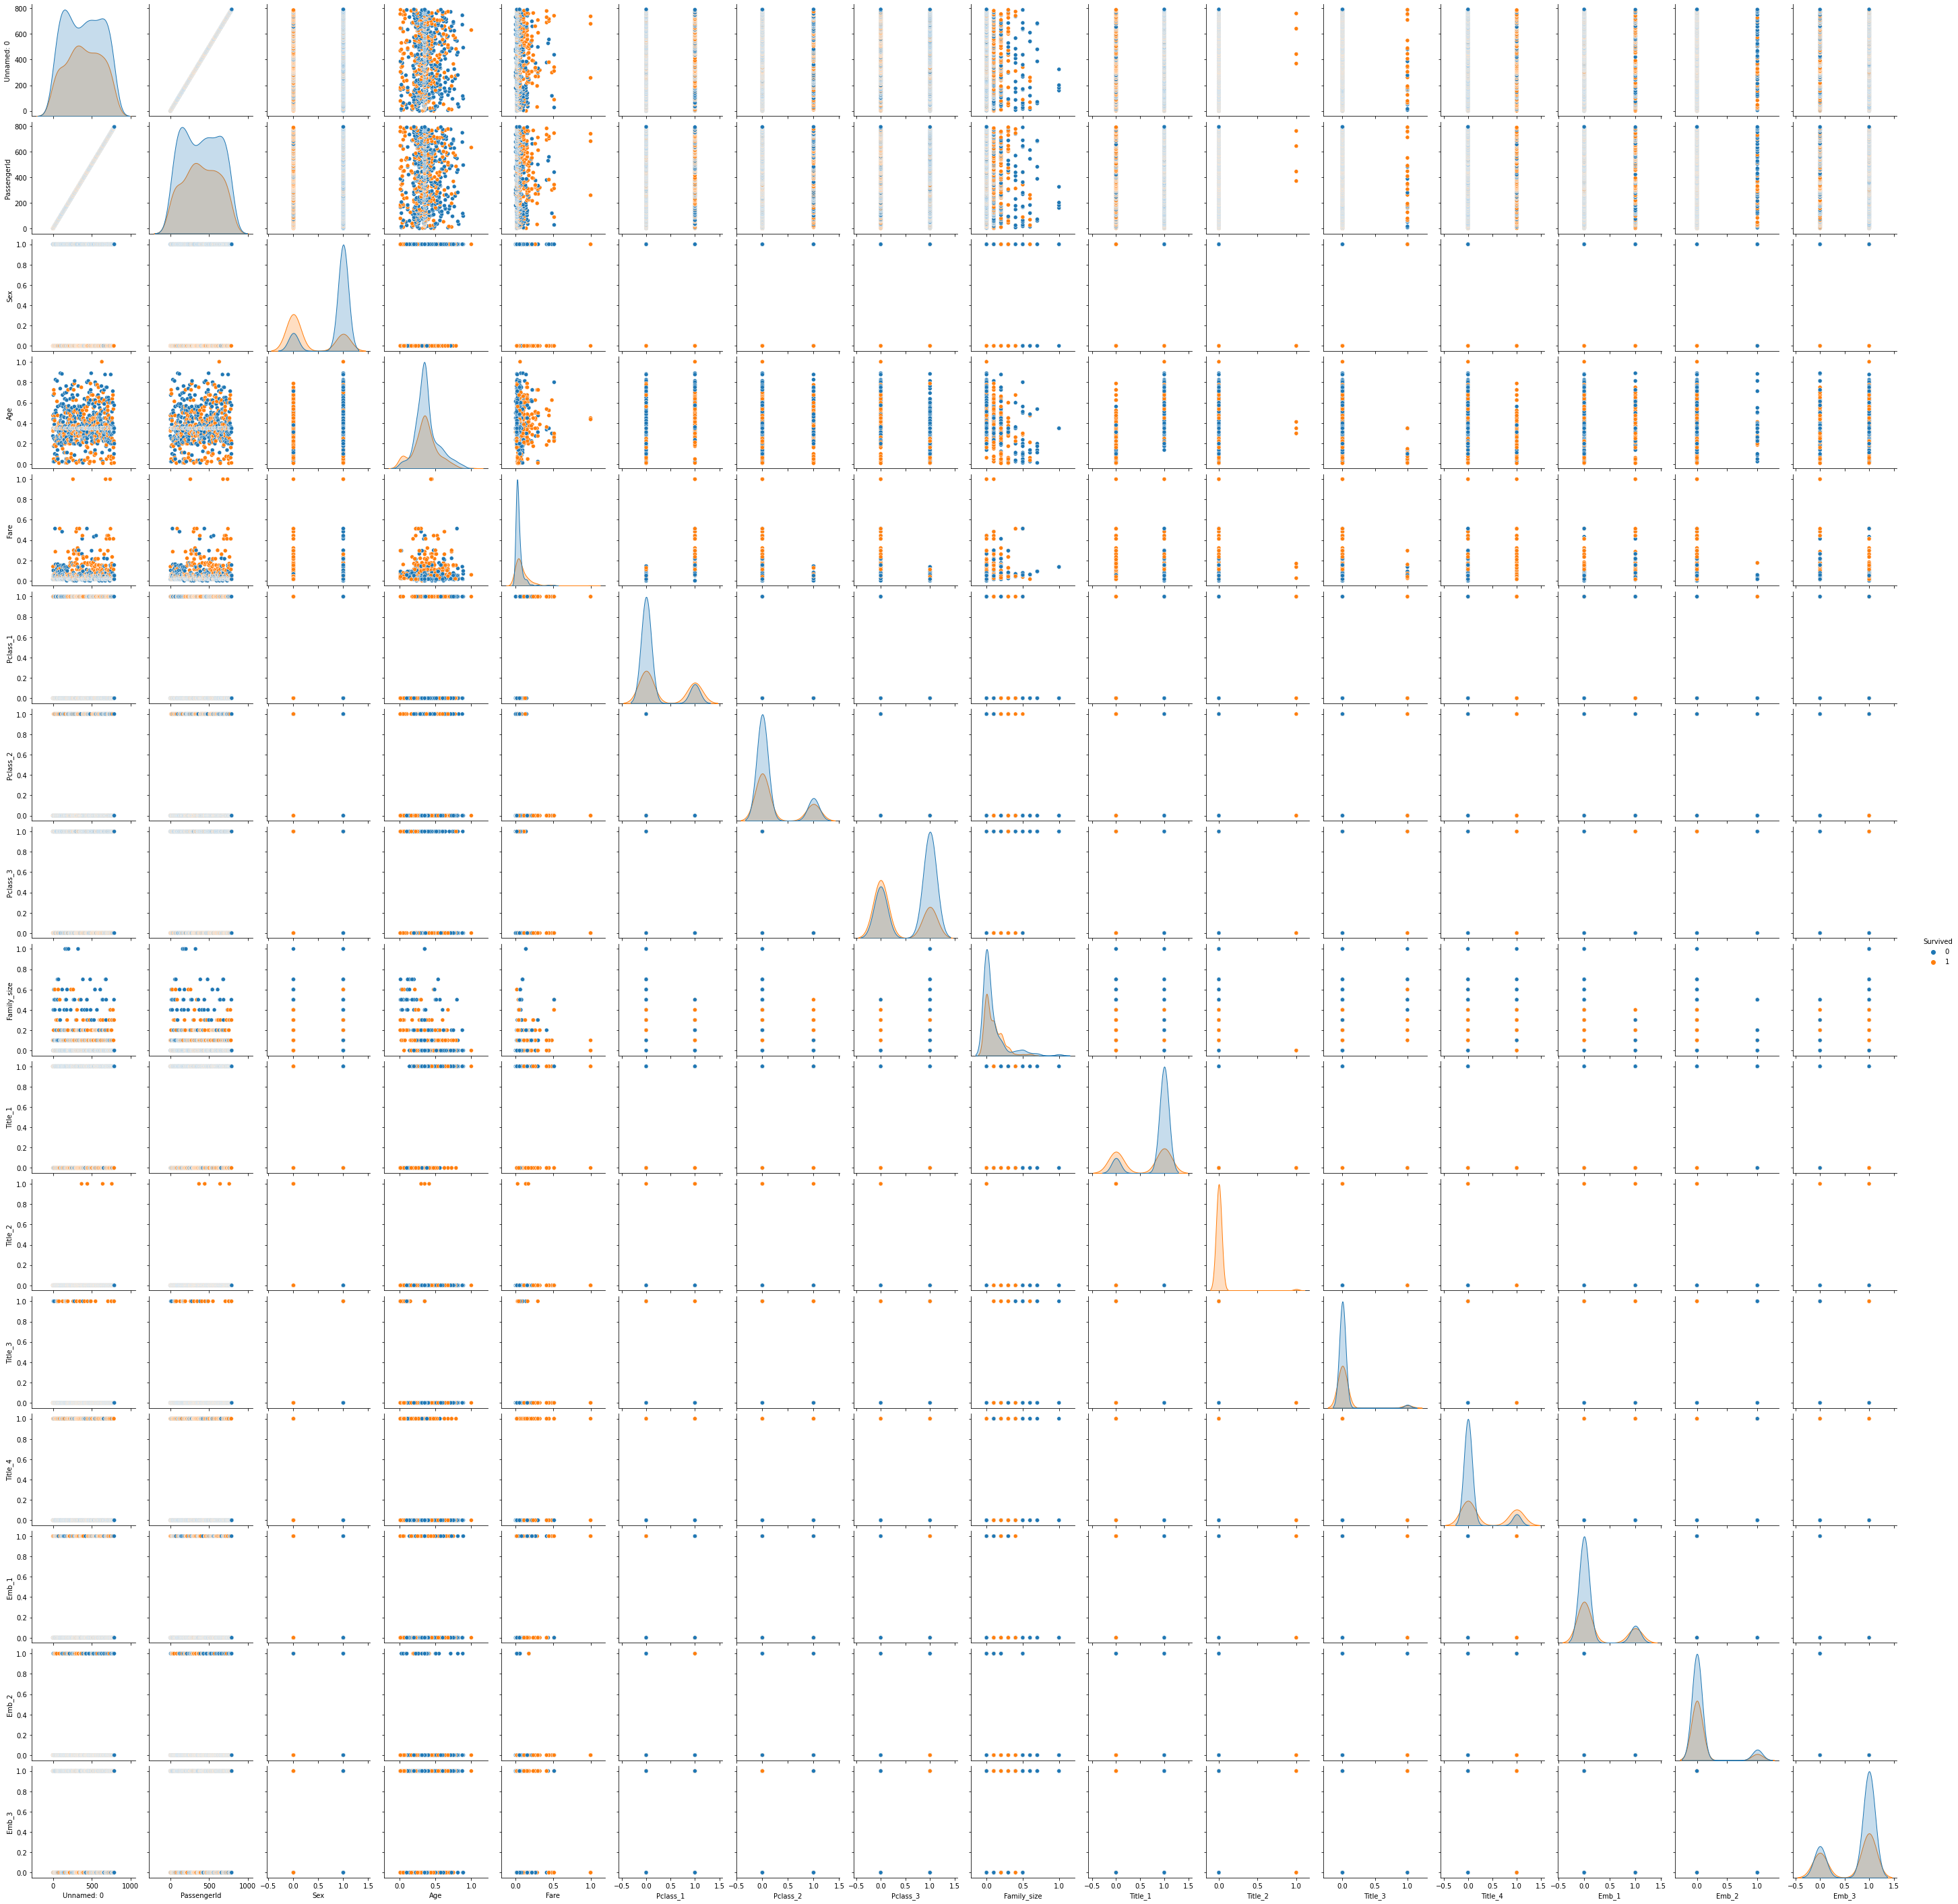

In [ ]:
#perform EDA
sns.pairplot(titanic_df,hue='Survived')

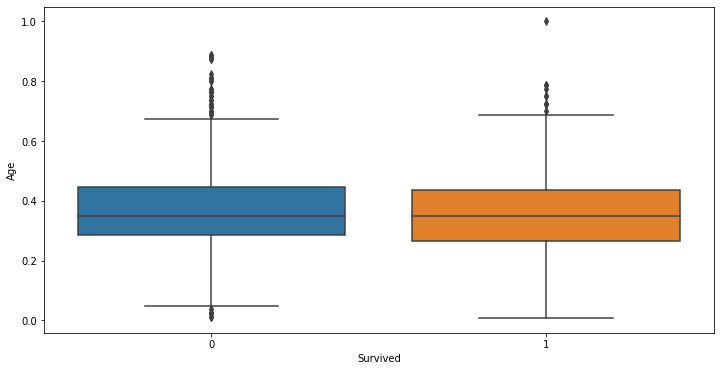

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=titanic_df, x='Survived',y='Age')

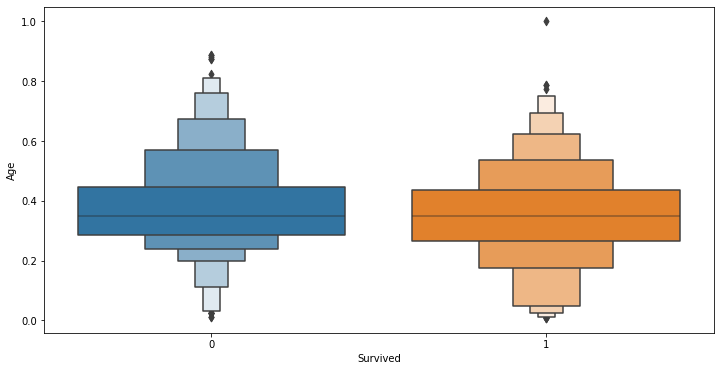

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=titanic_df, x='Survived',y='Age')

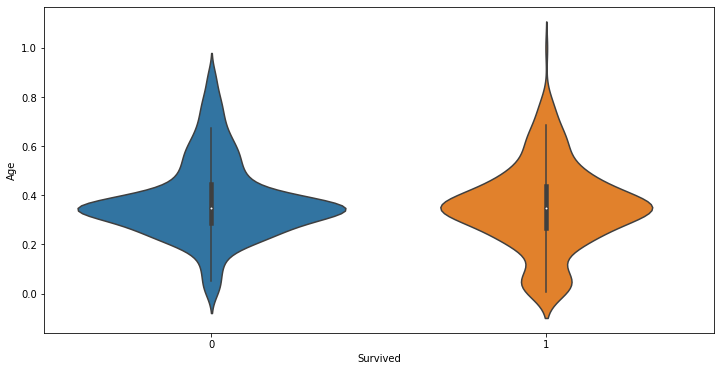

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=titanic_df, x='Survived',y='Age')

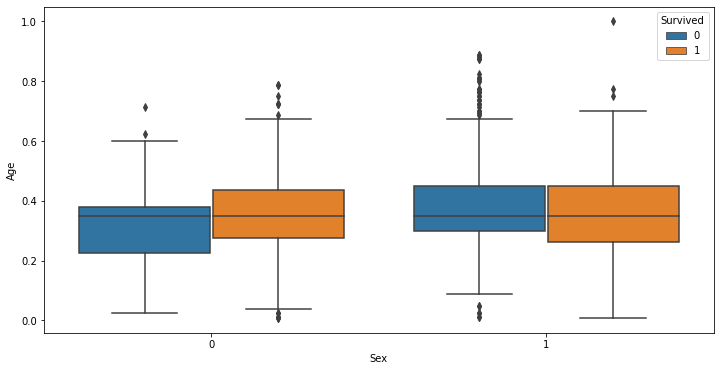

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=titanic_df, x='Sex',y='Age', hue='Survived')

In [ ]:
#prepare the data
X =titanic_df.drop(['Unnamed: 0','Survived'], axis=1)
y=titanic_df['Survived']

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from scipy.sparse.linalg import spilu
#instanciate the model
deci_tree=DecisionTreeClassifier(criterion='gini',
                       splitter='best',
                       max_depth=None,
                       min_samples_split=2,
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.5,
                       max_features=None,
                       random_state=None,
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       class_weight=None,
                       ccp_alpha=0.0)
deci_tree.fit(X_train,y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.5)

In [ ]:
# Making Predictions with Our Model
predictions =deci_tree.predict(X_test)
print(predictions[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(accuracy_score(y_test, predictions))

0.6176470588235294


In [ ]:
confusion_matrix(y_test, predictions)

array([[147,   0],
       [ 91,   0]])

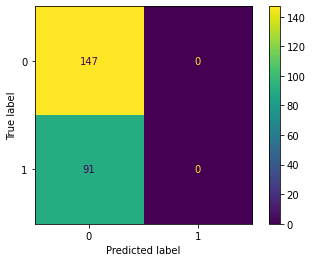

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       147
           1       0.00      0.00      0.00        91

    accuracy                           0.62       238
   macro avg       0.31      0.50      0.38       238
weighted avg       0.38      0.62      0.47       238



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#One of the ways in which we can attempt to improve the accuracy of a model is by adding in more useful features.
#Hyperparameter Tuning for Decision Tree Classifiers in Sklearn
params = {'criterion':  ['gini', 'entropy'],
          'max_depth':  [None, 2, 4, 6, 8, 10],
          'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
          'splitter': ['best', 'random']}

In [ ]:
grid_DeciTree=GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=params,
                           cv=5,
                           n_jobs=5,
                           verbose=1)
grid_DeciTree.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6,
                                          0.8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(grid_DeciTree.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.6, 'splitter': 'random'}


In [ ]:
grid_DeciTree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=0.6,
                       splitter='random')

In [ ]:
grid_DeciTree.feature_names_in_

array(['PassengerId', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3',
       'Title_4', 'Emb_1', 'Emb_2', 'Emb_3'], dtype=object)

In [ ]:
grid_DeciTree.n_features_in_

15

In [ ]:
y_preds=grid_DeciTree.best_estimator_.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
grid_DeciTree.score(X_test,y_test)

0.8067226890756303

In [ ]:
con_matrix=confusion_matrix(y_preds,y_test)
con_matrix

array([[127,  26],
       [ 20,  65]])

In [ ]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.71      0.76      0.74        85

    accuracy                           0.81       238
   macro avg       0.79      0.80      0.79       238
weighted avg       0.81      0.81      0.81       238



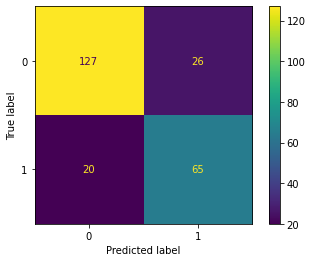

In [ ]:
new_disp=ConfusionMatrixDisplay(con_matrix)
new_disp.plot()
plt.show()

In [ ]:
probs=grid_DeciTree.predict_proba(X_test)
probs[:5]

array([[0.5       , 0.5       ],
       [0.88405797, 0.11594203],
       [0.73913043, 0.26086957],
       [0.88405797, 0.11594203],
       [0.88405797, 0.11594203]])

In [ ]:
no_higher=probs[probs>.8]
no_higher

array([0.88405797, 0.88405797, 0.88405797, 0.88888889, 0.88405797,
       0.88405797, 1.        , 0.88405797, 1.        , 0.88405797,
       1.        , 0.84615385, 0.84615385, 1.        , 1.        ,
       0.90909091, 0.88405797, 1.        , 1.        , 1.        ,
       1.        , 0.88405797, 1.        , 0.88405797, 0.88405797,
       1.        , 1.        , 0.88405797, 0.88405797, 0.88405797,
       0.88405797, 1.        , 0.88405797, 0.88405797, 1.        ,
       1.        , 0.88405797, 0.88405797, 0.88405797, 1.        ,
       0.88405797, 1.        , 0.88405797, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.88405797, 1.        ,
       0.88405797, 1.        , 1.        , 1.        , 1.        ,
       0.88405797, 0.88405797, 1.        , 0.84615385, 1.        ,
       0.88405797, 1.        , 1.        , 1.        , 1.        ,
       0.88405797, 1.        , 1.        , 0.88405797, 0.88405797,
       1.        , 1.        , 0.88405797, 0.88405797, 1.     

In [ ]:
new_pred=np.where(probs[:,0]>.7,0,1)
new_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
y_test

694    0
528    0
598    0
606    0
120    0
      ..
741    0
683    0
41     0
487    0
108    0
Name: Survived, Length: 238, dtype: int64

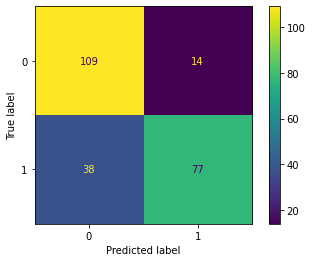

In [ ]:
disp_new=ConfusionMatrixDisplay(confusion_matrix(new_pred,y_test))
disp_new.plot()
plt.show()

In [ ]:
print(classification_report(new_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       123
           1       0.85      0.67      0.75       115

    accuracy                           0.78       238
   macro avg       0.79      0.78      0.78       238
weighted avg       0.79      0.78      0.78       238



In [ ]:
grid_DeciTree.best_score_

0.8213431613431613

In [ ]:
grid_DeciTree.cv_results_['std_test_score']

array([0.02612908, 0.01063566, 0.05168879, 0.04606583, 0.01510912,
       0.03384341, 0.03415092, 0.039941  , 0.02766526, 0.03969043,
       0.02313355, 0.02467113, 0.03191564, 0.03471897, 0.0515255 ,
       0.04101355, 0.06035865, 0.06170503, 0.08041436, 0.05578057,
       0.03709709, 0.04172644, 0.06133391, 0.04848491, 0.07108724,
       0.0785839 , 0.0513305 , 0.05118084, 0.04657488, 0.04456622,
       0.0428267 , 0.08603529, 0.03204613, 0.06983902, 0.03141207,
       0.02151666, 0.0364815 , 0.02786945, 0.03800638, 0.02703892,
       0.04147865, 0.0087085 , 0.03579165, 0.03620519, 0.04594563,
       0.05305898, 0.06281548, 0.033363  , 0.05129918, 0.04539025,
       0.02315509, 0.03150054, 0.04195125, 0.03704935, 0.02473645,
       0.0126794 , 0.0271538 , 0.00637088, 0.00668144, 0.03721778,
       0.02457284, 0.05932175, 0.04525185, 0.02539577, 0.03262051,
       0.02549703, 0.02083821, 0.02981174, 0.04038777, 0.02130725,
       0.04330752, 0.01793144, 0.02719229, 0.05713827, 0.02678

In [ ]:
grid_DeciTree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6,
                                          0.8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
#create a pipeline
pipe=Pipeline(
    steps=[('classifier',DecisionTreeClassifier())]
)

In [ ]:
params = {'classifier__criterion':  ['gini', 'entropy'],
          'classifier__max_depth':  [None, 2, 4, 6, 8, 10],
          'classifier__max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
          'classifier__splitter': ['best', 'random']}
grid_pipe=GridSearchCV(estimator=pipe,
                       param_grid=params,
                       cv=5)
grid_pipe.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 2, 4, 6, 8, 10],
                         'classifier__max_features': [None, 'sqrt', 'log2', 0.2,
                                                      0.4, 0.6, 0.8],
                         'classifier__splitter': ['best', 'random']})

In [ ]:
grid_pipe.best_estimator_

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features=0.4))])

In [ ]:
grid_pipe.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__max_features': 0.4,
 'classifier__splitter': 'best'}

In [ ]:
grid_pipe.best_score_

0.8159049959049959

In [ ]:
grid_pipe.param_grid

{'classifier__criterion': ['gini', 'entropy'],
 'classifier__max_depth': [None, 2, 4, 6, 8, 10],
 'classifier__max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
 'classifier__splitter': ['best', 'random']}

In [ ]:
grid_pipe.best_estimator_.named_steps['classifier'].predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

### From Prof. Hug class

In [ ]:
from sklearn import tree
decision_tree_model=tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
X.columns

Index(['PassengerId', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1',
       'Emb_2', 'Emb_3'],
      dtype='object')

In [ ]:
titanic_df['Survived'].unique()

array([0, 1])

[Text(0.4670721476510067, 0.975, 'Sex <= 0.5\nentropy = 0.964\nsamples = 554\nvalue = [339, 215]\nclass = No'),
 Text(0.13926174496644295, 0.925, 'Pclass_3 <= 0.5\nentropy = 0.805\nsamples = 195\nvalue = [48, 147]\nclass = Yes'),
 Text(0.053691275167785234, 0.875, 'Age <= 0.031\nentropy = 0.235\nsamples = 104\nvalue = [4, 100]\nclass = Yes'),
 Text(0.026845637583892617, 0.825, 'Fare <= 0.173\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.013422818791946308, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.040268456375838924, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.08053691275167785, 0.825, 'PassengerId <= 502.0\nentropy = 0.191\nsamples = 102\nvalue = [3, 99]\nclass = Yes'),
 Text(0.06711409395973154, 0.775, 'PassengerId <= 498.0\nentropy = 0.27\nsamples = 65\nvalue = [3, 62]\nclass = Yes'),
 Text(0.053691275167785234, 0.725, 'Fare <= 0.056\nentropy = 0.201\nsamples = 64\nvalue = [2, 62]\nclass = Yes'),
 Te

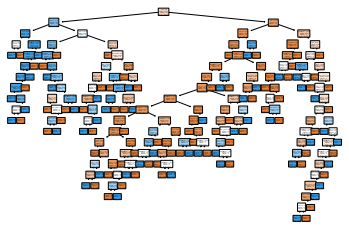

In [ ]:
from numpy.ma import filled
tree.plot_tree(decision_tree_model,feature_names=['PassengerId', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3','Family_size',
                                                  'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1','Emb_2', 'Emb_3'],
               class_names=['No','Yes'],
               rounded=True,
               filled=True)

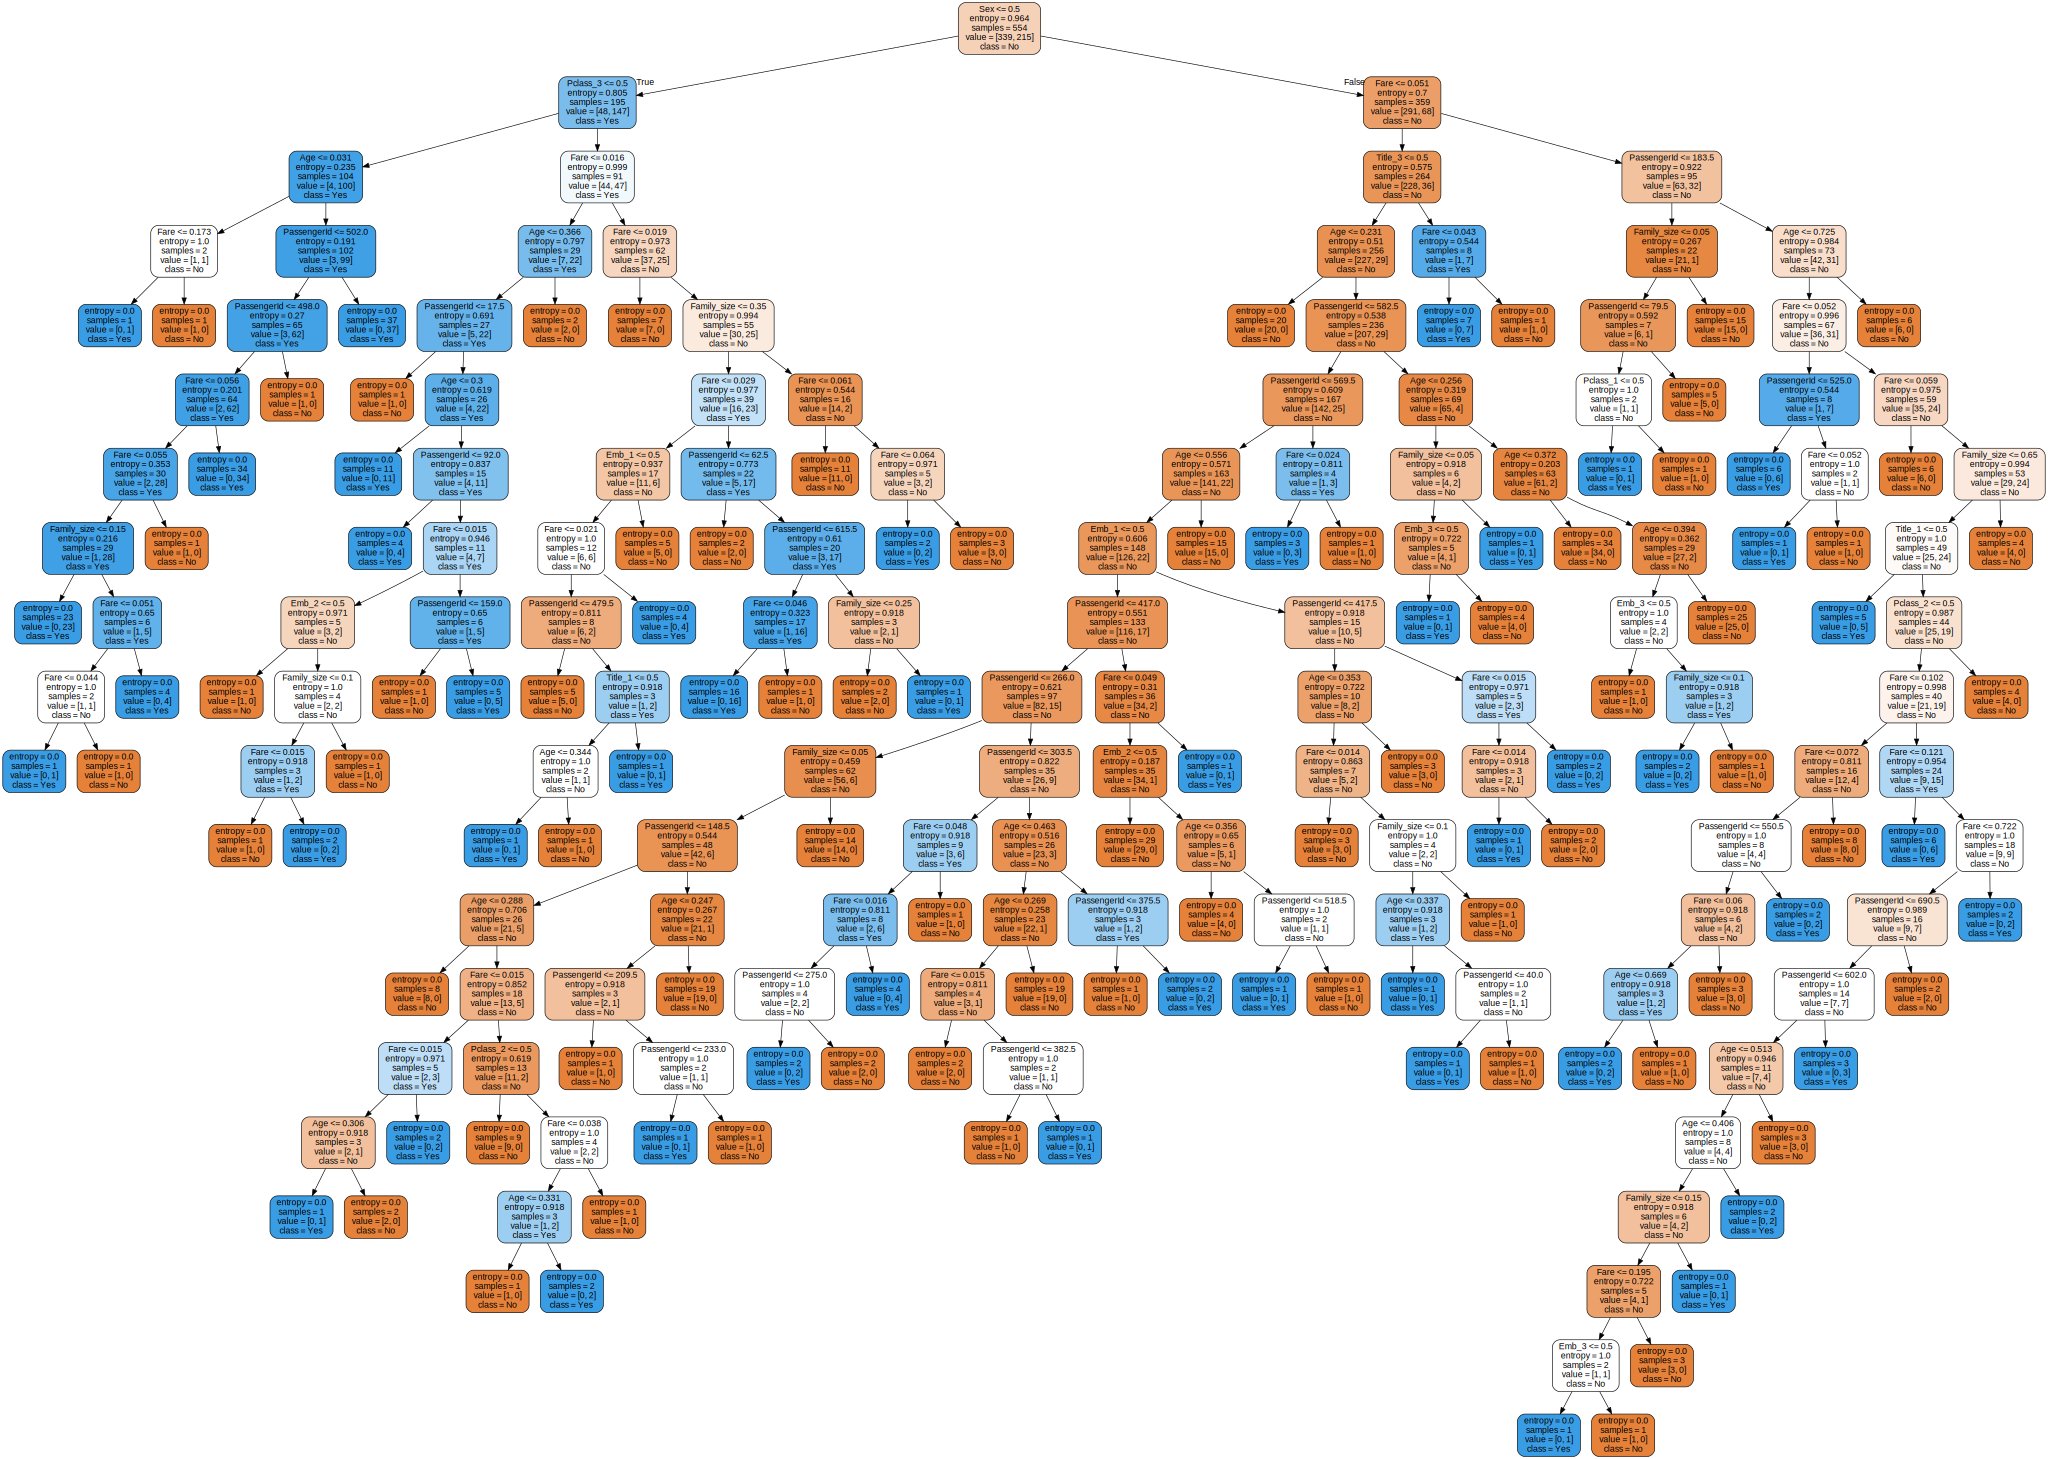

In [ ]:
#better libary to visualize the decision tree graph
import graphviz
dot_data=tree.export_graphviz(decision_tree_model,out_file=None,
                              feature_names=['PassengerId', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3','Family_size',
                                                  'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1','Emb_2', 'Emb_3'],
                              class_names=['No','Yes'],
                              rounded=True,
                              filled=True) 
graph=graphviz.Source(dot_data)
graph.render(format="png",filename='Titanic tree')
graph